In [1]:
from gensim.models import Word2Vec

import numpy as np
import pandas as pd

from sklearn.decomposition import PCA

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Data

In [2]:
#  A list of 100 000 lists
sentences = []

for i in range(100000):
    #  Generate a starting number
    start = np.random.randint(0, 10)
    #  Generate a finish number
    finish = start + np.random.randint(3, 20)
    #  Generating sentences, list comprehension
    sentence = [str(x) for x in range(start, finish)]
    
    sentences.append(sentence)

### Model Word2Vec

In [3]:
model = Word2Vec(sentences, size=10, window=5, min_count=1)

In [4]:
model.wv['1']

array([ 3.69887   , -1.8332316 , -5.555922  , -0.8949411 , -0.10626621,
        0.68247706,  1.2255515 ,  2.1522026 ,  3.6366892 , -0.62264407],
      dtype=float32)

In [5]:
def plot_heatmap(model):
    plt.figure(figsize=(15, 8))
    sns.heatmap( model.wv[model.wv.vocab], linewidths=0.5 );

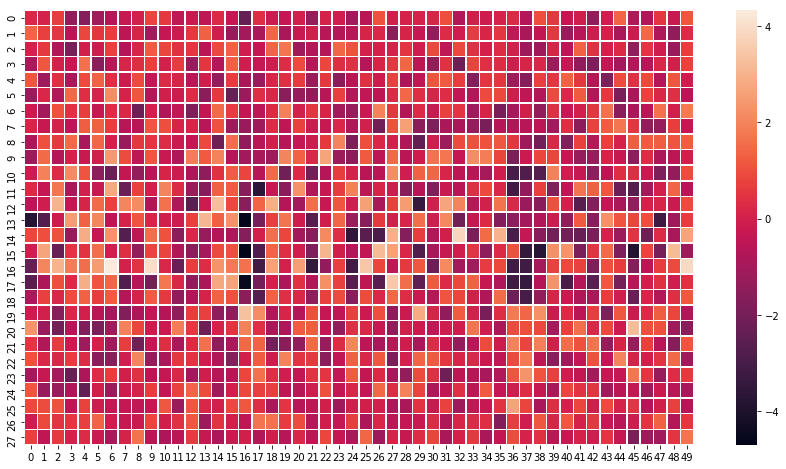

In [6]:
plot_heatmap(Word2Vec(sentences, size=50, window=10))

### PCA

In [12]:
#  Dimension reduction from 10 to 2
def plot_pca(model):
    X = model.wv[model.wv.vocab]
    pca_model = PCA(n_components=2)
    result = pca_model.fit_transform(X)

    plt.figure(figsize=(8, 5))
    plt.scatter(result[:,0], result[:,1]);

    #  Annotation of where words are
    words = list(model.wv.vocab)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

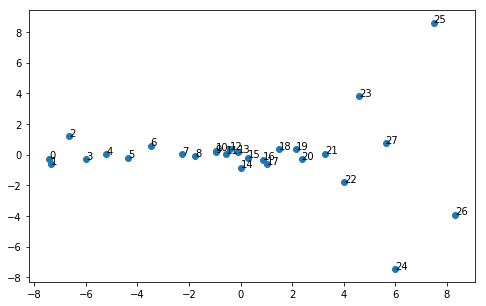

In [13]:
plot_pca(Word2Vec(sentences, size=50, window=10))

### Similar words

In [14]:
model = Word2Vec(sentences, size=300, window=5)

In [15]:
model.wv.most_similar('4', topn=3)   #  Most similar to 4

[('1', 0.41238564252853394),
 ('0', 0.3783690333366394),
 ('2', 0.25104308128356934)]

In [16]:
#  10 + 8 - 6
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

[('26', 0.25191837549209595),
 ('24', 0.1836184859275818),
 ('19', 0.16833153367042542)]

### New data

In [17]:
#  A list of 100 000 lists
sentences = []

for i in range(100000):
    #  Generate a starting number
    start = np.random.randint(0, 20)
    #  Generate a finish number
    finish = start + np.random.randint(1, 10)
    #  Generating sentences, list comprehension
    sentence = [str(x) for x in range(start, finish)]
    
    sentences.append(sentence)

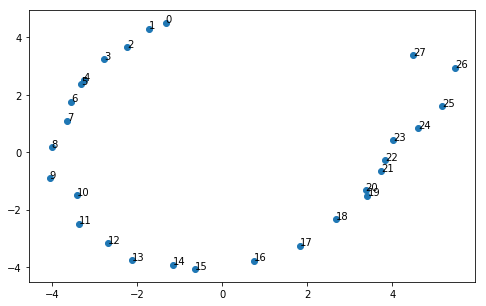

In [18]:
plot_pca(Word2Vec(sentences, size=300, window=5))

In [21]:
model = Word2Vec(sentences, size=300, window=5)

In [22]:
model.wv.most_similar('4', topn=3)   #  Most similar to 4

[('0', 0.5681025981903076),
 ('1', 0.5077217817306519),
 ('2', 0.4737679660320282)]

In [23]:
#  10 + 8 - 6 = 12
model.wv.most_similar(positive=['10', '8'], negative=['6'], topn=3)

[('12', 0.30641722679138184),
 ('11', 0.3038228154182434),
 ('13', 0.2555980682373047)]

##### The model unsupervised learned mathematical operations (without explaining how the mathematics works).